In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
raw_df = pd.read_csv('/content/weatherAUS.csv')

In [4]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
raw_df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [7]:
raw_df.dropna(subset='RainTomorrow', inplace=True)

In [8]:
import plotly.express as px
px.histogram(raw_df, x='Location', title='Location vs. RainTomorrow', y= 'Sunshine', color ='RainTomorrow' )

In [9]:
px.histogram(raw_df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [10]:
px.histogram(raw_df,
             x='Temp3pm',
             title='Temperature at 3 pm vs. Rain Tomorrow',
             color='RainTomorrow')

### **Preparing the Data for Training**

1.Create a train/test/validation split

2.Identify input/target columns

3.Identify numeric and categorial columns

4.Impute(fill) missing numeric values

5.Scale numeric values to the (0,1) range

6.Encode categorial columns to one-hot encoders

### **Training, Validation and Test Sets**

<Axes: xlabel='Date', ylabel='count'>

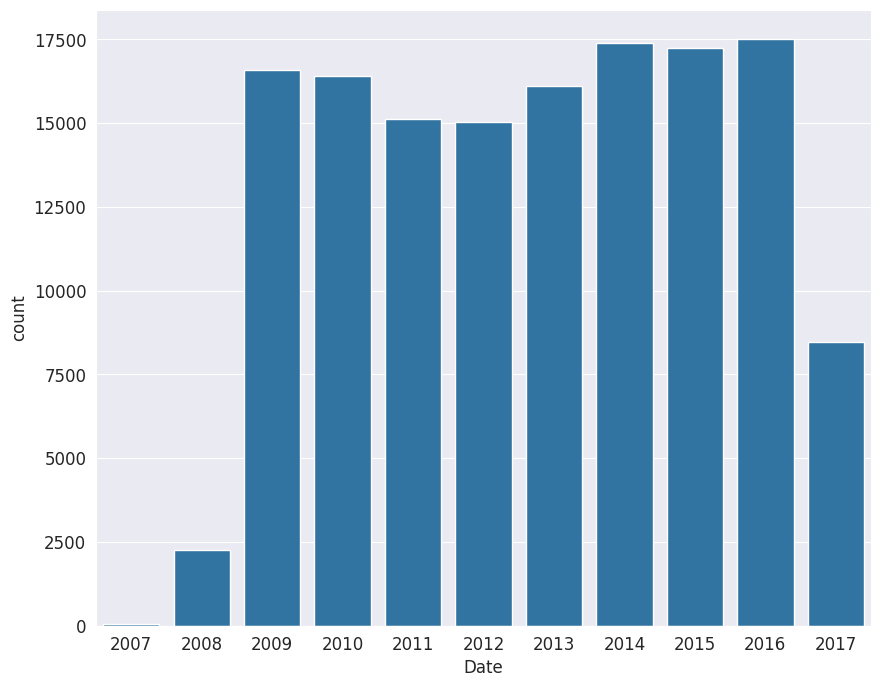

In [11]:
plt.title=('No of rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [12]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [13]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
2498         NaN         ENE           54.0        NaN        ESE   
2499         NaN         SSE           50.0        SSE         SE   
2500         NaN         ENE           48.0        ESE        ENE   
2501         NaN         SSE           39.0         SE        SSE   
2502         NaN         ENE           31.0         SE        SSE   
...          ...         ...            ...        ...        ...   
145454       NaN           E           31.0        ESE          E   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498             0.0           7.0         46.0         17.0       1013.4   
2499             9.0          17.0         54.0         30.0       1011.1   
2500            11.0          39.0         62.0         67.0       1014.0   
2501             9.0          17.0         74.0         65.0       1017.9   
2502             6.0           9.0         92.0         63.0       1016.3   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
2498         1009.2       7.0       3.0     26.1     36.7        No   
2499         1008.4       8.0       8.0     24.8     31.7        No   
2500         1014.8       8.0       8.0     21.8     19.5       Yes   
2501         1016.5       8.0       8.0     19.2     21.6       Yes   
2502         1013.9       8.0       8.0     17.2     22.2       Yes   
...             ...       ...       ...      ...      ...       ...   
145454       1021.2       NaN       NaN      9.4     20.9        No   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   

       RainTomorrow  
2498             No  
2499            Yes  
2500            Yes  
2501            Yes  
2502             No  
...             ...  
145454           No  
145455           No  
145456           No  
145457           No  
145458           No  

[25974 rows x 23 columns]

In [14]:
print('train.df.shape: ', train_df.shape)
print('val.df.shape: ', val_df.shape)
print('test.df.shape: ', test_df.shape)


train.df.shape:  (98988, 23)
val.df.shape:  (17231, 23)
test.df.shape:  (25974, 23)


### **Input Columns and Target Columns**

In [15]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [16]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

Lets Identify the numric and categorial columns

In [17]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()
categorial_cols=train_inputs.select_dtypes('object').columns.to_list()

In [18]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [19]:
print(categorial_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Imputing missing numeric values

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [22]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [23]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [24]:
val_inputs.describe().loc[['min','max']]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min     -8.2     -3.2       0.0          0.0       0.0            7.0   
max     31.9     45.4     247.2         70.4      14.5          135.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min           0.0           0.0          4.0          0.0        988.1   
max          87.0          74.0        100.0        100.0       1039.3   

     Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
min        982.2       0.0       0.0     -6.2     -4.0  
max       1037.3       8.0       8.0     37.5     42.8

Scaling Numeric Features

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [27]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [28]:
val_inputs.describe().loc[['min','max']]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
min  0.007075  0.030246  0.000000     0.000000       0.0       0.007752   
max  0.952830  0.948960  0.666307     0.485517       1.0       1.000000   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
min      0.000000      0.000000         0.04          0.0     0.125620   
max      0.669231      0.850575         1.00          1.0     0.971901   

     Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
min       0.0816  0.000000  0.000000  0.021097  0.026871  
max       0.9632  0.888889  0.888889  0.943038  0.925144

Encoding the data

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
train_inputs[categorial_cols] = train_inputs[categorial_cols].fillna('Unknown')
val_inputs[categorial_cols] = val_inputs[categorial_cols].fillna('Unknown')
test_inputs[categorial_cols] = test_inputs[categorial_cols].fillna('Unknown')

In [31]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorial_cols])

In [32]:
encoded_cols = list(encoder.get_feature_names_out(categorial_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [33]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorial_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorial_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorial_cols])

/tmp/ipython-input-3392582372.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-3392582372.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-3392582372.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-3392582372.py:1: PerformanceWarning:

In [34]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037723  0.525852   
2499     Albury  0.693396  0.725898  0.001078     0.037723  0.525852   
2500     Albury  0.634434  0.527410  0.005930     0.037723  0.525852   
2501     Albury  0.608491  0.538752  0.042049     0.037723  0.525852   
2502     Albury  0.566038  0.523629  0.018329     0.037723  0.525852   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037723  0.525852   
145455    Uluru  0.266509  0.533081  0.000000     0.037723  0.525852   
145456    Uluru  0.285377  0.568998  0.000000     0.037723  0.525852   
145457    Uluru  0.327830  0.599244  0.000000     0.037723  0.525852   
145458    Uluru  0.384434  0.601134  0.000000     0.037723  0.525852   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093    Unknown        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.493021  0.500352  0.350211  0.504798        No                0.0   
145455  0.493021  0.500352  0.364979  0.533589        No                0.0   
145456  0.493021  0.500352  0.381857  0.573896        No                0.0   
145457  0.493021  0.500352  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

In [35]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [36]:
X_train

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037723  0.525852       0.294574   
1       0.375000  0.565217  0.000000     0.037723  0.525852       0.294574   
2       0.504717  0.576560  0.000000     0.037723  0.525852       0.310078   
3       0.417453  0.620038  0.000000     0.037723  0.525852       0.139535   
4       0.613208  0.701323  0.002695     0.037723  0.525852       0.271318   
...          ...       ...       ...          ...       ...            ...   
144548  0.599057  0.718336  0.000000     0.037723  0.525852       0.286822   
144549  0.556604  0.786389  0.000000     0.037723  0.525852       0.193798   
144550  0.608491  0.805293  0.000000     0.037723  0.525852       0.255814   
144551  0.674528  0.818526  0.000000     0.037723  0.525852       0.286822   
144552  0.731132  0.839319  0.000000     0.037723  0.525852       0.542636   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.153846      0.275862         0.71         0.22     0.449587   
1           0.030769      0.252874         0.44         0.25     0.497521   
2           0.146154      0.298851         0.38         0.30     0.447934   
3           0.084615      0.103448         0.45         0.16     0.613223   
4           0.053846      0.229885         0.82         0.33     0.500826   
...              ...           ...          ...          ...          ...   
144548      0.184615      0.298851         0.22         0.13     0.555372   
144549      0.146154      0.229885         0.16         0.08     0.530579   
144550      0.200000      0.103448         0.15         0.08     0.519008   
144551      0.215385      0.195402         0.22         0.09     0.553719   
144552      0.230769      0.149425         0.16         0.09     0.522314   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0            0.4800  0.888889  0.500352  0.508439  0.522073   
1            0.4912  0.493021  0.500352  0.514768  0.570058   
2            0.5056  0.493021  0.222222  0.594937  0.548944   
3            0.5712  0.493021  0.500352  0.533755  0.612284   
4            0.4624  0.777778  0.888889  0.527426  0.673704   
...             ...       ...       ...       ...       ...   
144548       0.5232  0.493021  0.500352  0.651899  0.714012   
144549       0.4880  0.493021  0.500352  0.761603  0.771593   
144550       0.4944  0.493021  0.500352  0.778481  0.788868   
144551       0.5136  0.493021  0.500352  0.780591  0.817658   
144552       0.4656  0.493021  0.500352  0.786920  0.821497   

        Location_Adelaide  Location_Albany  Location_Albury  \
0                     0.0              0.0              1.0   
1                     0.0              0.0              1.0   
2                     0.0              0.0              1.0   
3                     0.0              0.0              1.0   
4                     0.0              0.0              1.0   
...                   ...              ...              ...   
144548                0.0              0.0              0.0   
144549                0.0              0.0              0.0   
144550                0.0              0.0              0.0   
144551                0.0              0.0              0.0   
144552                0.0              0.0              0.0   

        Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  \
0                         0.0                     0.0                0.0   
1                         0.0                     0.0                0.0   
2                         0.0                     0.0                0.0   
3                         0.0                     0.0                0.0   
4                         0.0                     0.0                0.0   
...                       ...                     ...                ...   
144548                    0.0                     0.0                0.0   
144549                   

In [37]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

### **Training and Visualizing Decision Trees**

A desicion tree in general parlance represents a hierachical series of binary decisions:

### **Training**

We can use `DecisionTreeClassifier` from `sklearn.tree` to train decision tree.

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model = DecisionTreeClassifier(random_state=42)

In [40]:
%time
model.fit(X_train, train_target)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


DecisionTreeClassifier(random_state=42)

## Evavluation

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
train_preds = model.predict(X_train)

In [43]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [44]:
pd.value_counts(train_preds)

/tmp/ipython-input-1258350197.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



No     76707
Yes    22281
Name: count, dtype: int64

In [45]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

In [46]:
accuracy_score(train_preds, train_target)

0.9999797955307714

In [47]:
test_preds = model.predict(X_test)

In [48]:
accuracy_score(test_preds, test_target)

0.7753522753522754

In [49]:
train_prob = model.predict_proba(X_train)

In [50]:
train_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

We can make predictions and compute accuracy in one step using `model.score`

In [51]:
model.score(X_val, val_target)

0.791654576054785

In [52]:
val_target.value_counts() / len(val_target)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

### Visualization

We can visualize the decision tree learned from the training data.

In [53]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.9, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.7, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.3, 'Pressure3pm <= 0.583\ngini = 0.363\nsamples = 12620\nvalue = [9618, 3002]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Humidity3pm <= 0.512\ngini = 0.153\nsamples = 56632\nvalue = [51920, 4712]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.3, 'WindGustSpeed <= 0.318\ngini = 0.293\nsamples = 4299\nvalue = [3531, 768]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'WindGustSpeed <= 0.333\ngini = 0.478\nsampl

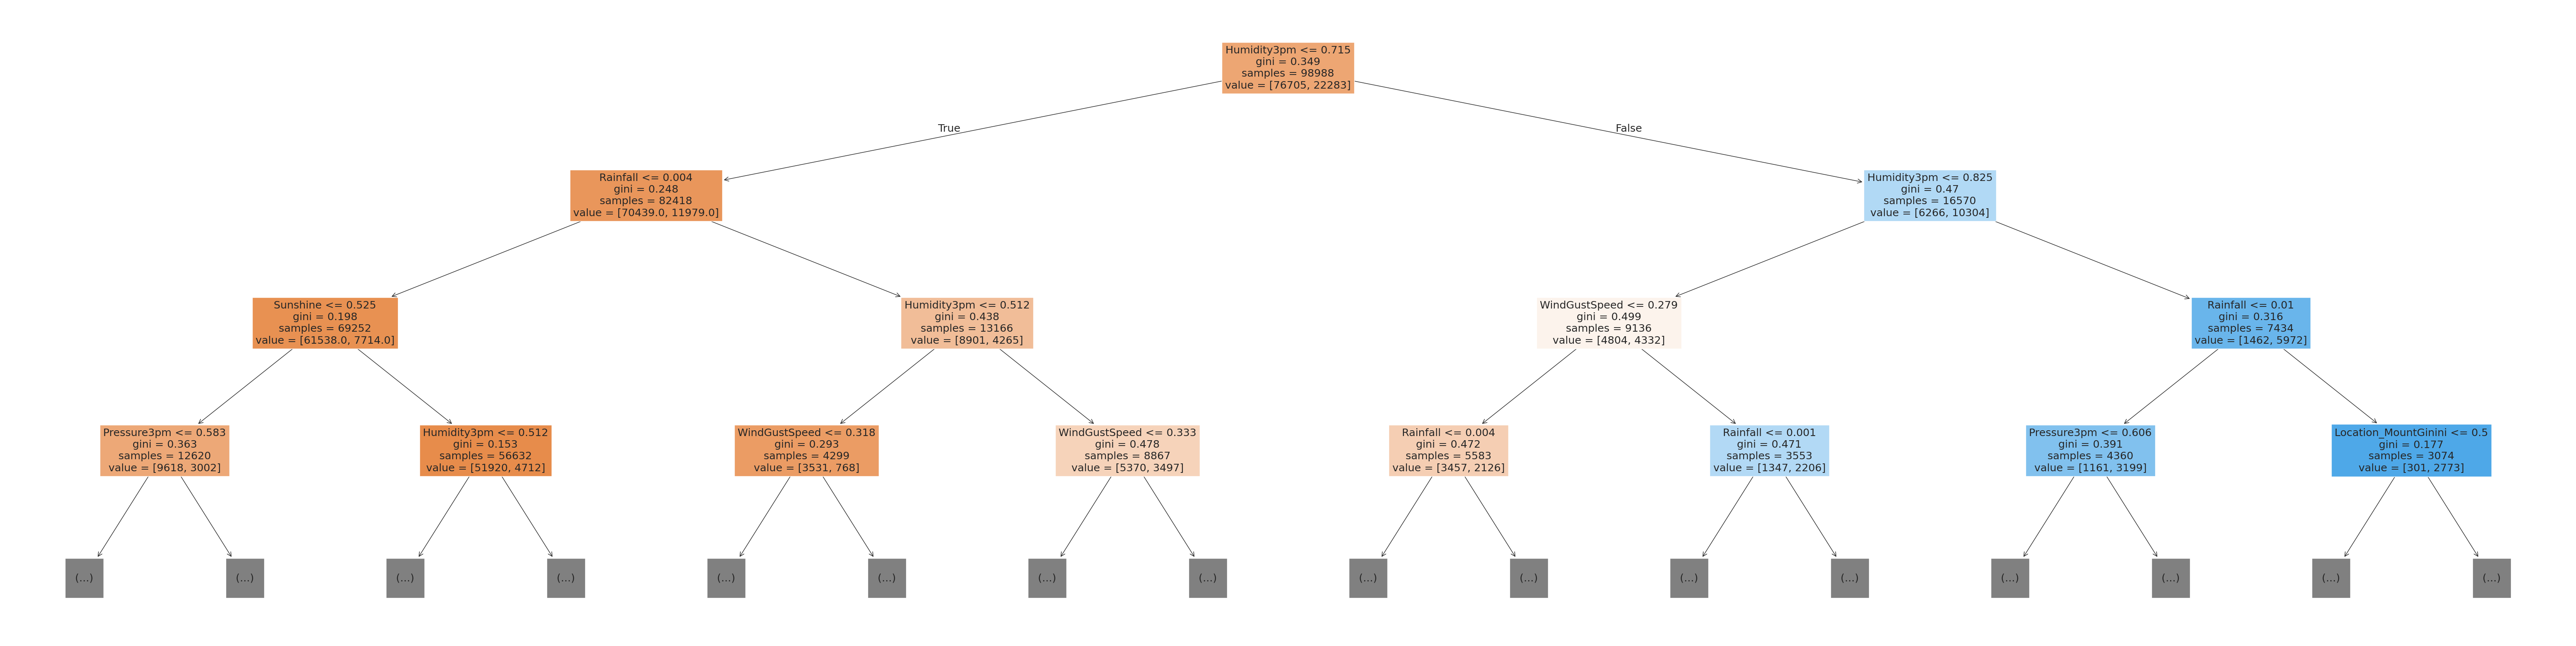

In [54]:
plt.figure(figsize =(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125,

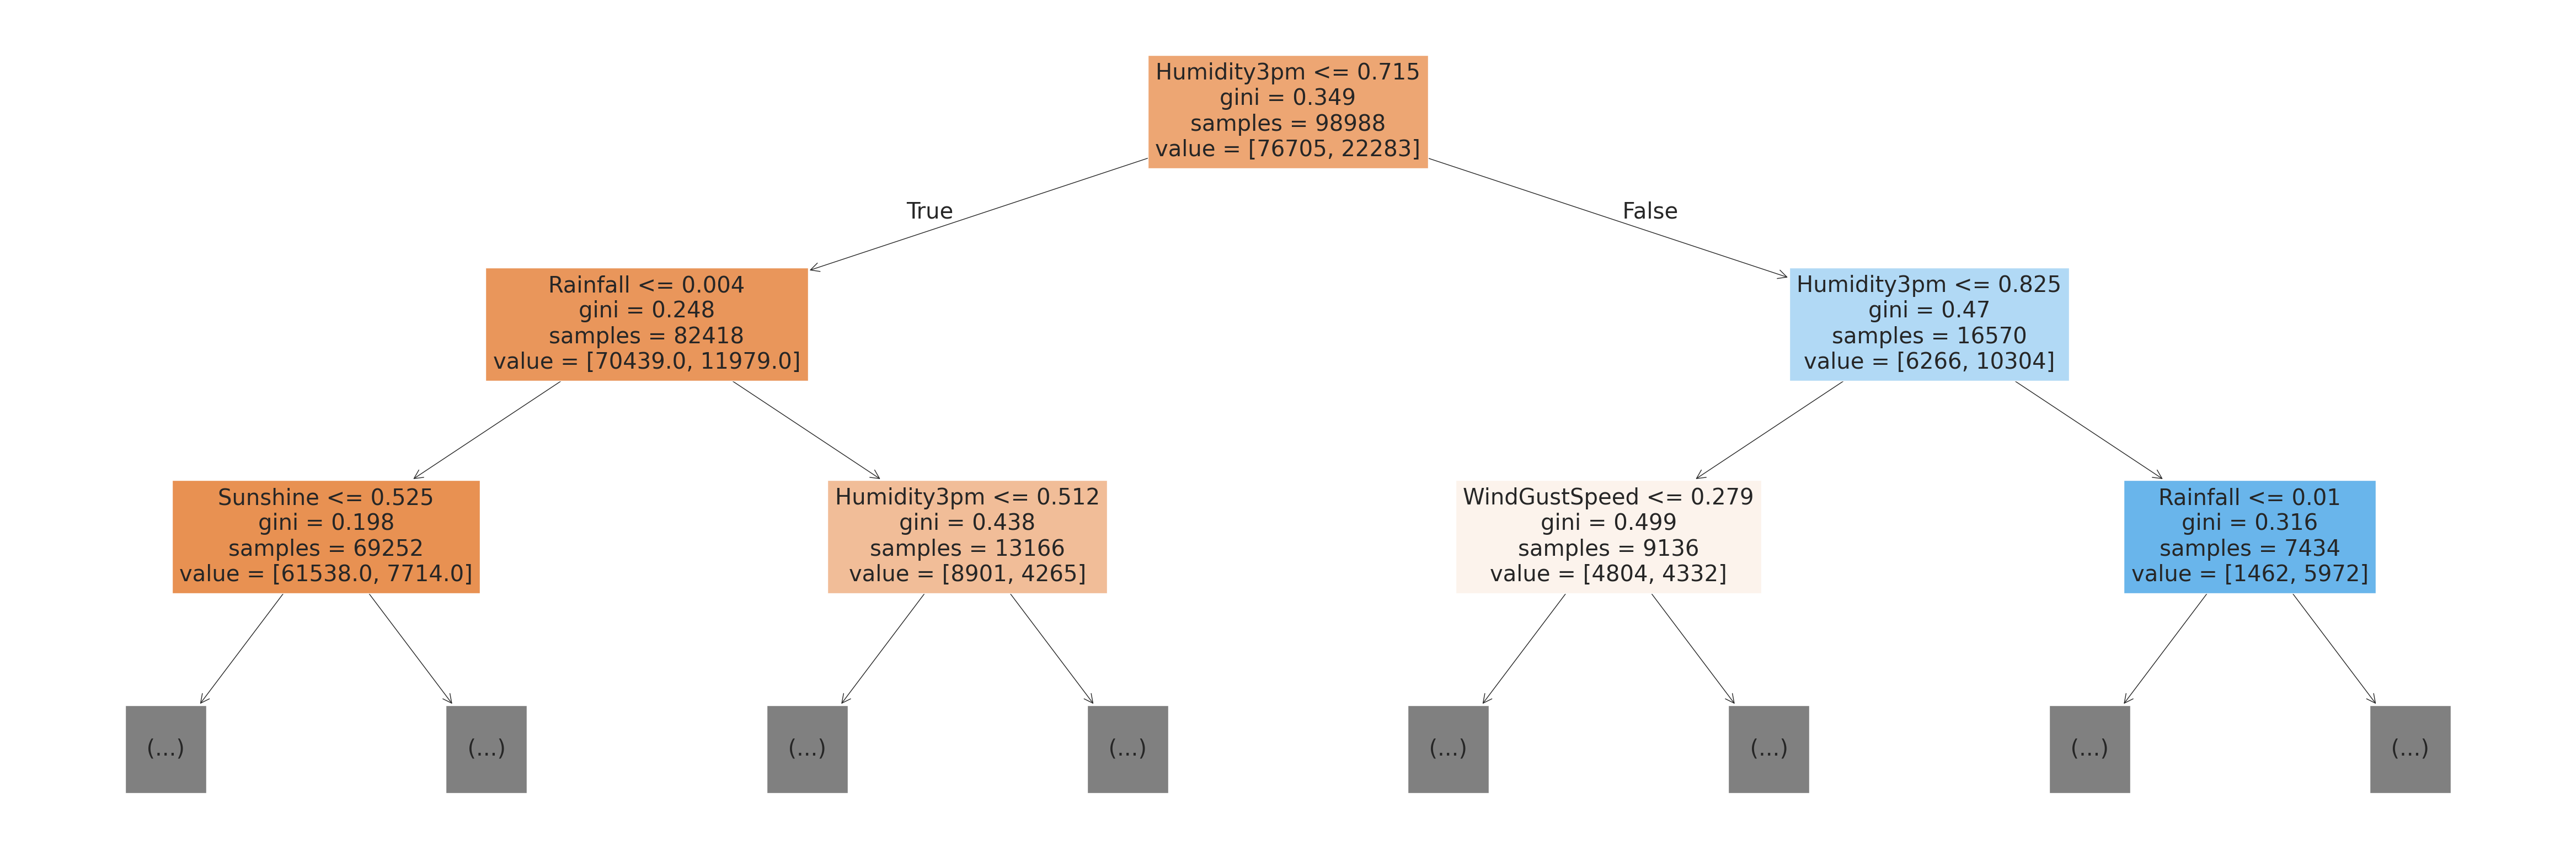

In [55]:
plt.figure(figsize =(60,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

## **GINI Index**

Gini is the loss function in the decision tree to decide which column should be used for splitting the data, and at the what point the column should be split. A lower gini index indicates a better split. A perfect split(only one class on each side) has a gini index 0.

In [56]:
model.tree_.max_depth

48

We can also display the tree as text, it gonna be easy to follow for deeper trees.

In [57]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

### Feature Importance

In [58]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

In [59]:
model.feature_importances_

array([0.03450243, 0.0326979 , 0.0588707 , 0.02398851, 0.04973483,
       0.05536477, 0.02888049, 0.02916332, 0.03948956, 0.26258596,
       0.03464976, 0.06252979, 0.01335156, 0.01832233, 0.03344341,
       0.03103312, 0.00229202, 0.00242598, 0.00137905, 0.00072507,
       0.00153394, 0.00118986, 0.00076956, 0.0015545 , 0.00107346,
       0.00141115, 0.00107036, 0.00196324, 0.00181935, 0.00034969,
       0.00100552, 0.00155723, 0.00046338, 0.00101511, 0.00169162,
       0.00084242, 0.00105612, 0.00086093, 0.00168535, 0.00187041,
       0.00051907, 0.00047732, 0.00149774, 0.00154991, 0.00137383,
       0.00122996, 0.00074085, 0.00140641, 0.0010652 , 0.0021117 ,
       0.00070719, 0.00175523, 0.00097529, 0.00137448, 0.00116001,
       0.00042945, 0.00151262, 0.00034984, 0.00081469, 0.00148406,
       0.00152123, 0.00148832, 0.00265512, 0.0019318 , 0.00033358,
       0.0014037 , 0.00150786, 0.00207691, 0.00347399, 0.00252085,
       0.00225861, 0.00221304, 0.00333089, 0.00219937, 0.00302

In [60]:
important_df = pd.DataFrame({
    'feature': X_train.columns,
    'important': model.feature_importances_
}).sort_values('important', ascending = False)

In [61]:
important_df.head(10)

feature  important
9     Humidity3pm   0.262586
11    Pressure3pm   0.062530
2        Rainfall   0.058871
5   WindGustSpeed   0.055365
4        Sunshine   0.049735
8     Humidity9am   0.039490
10    Pressure9am   0.034650
0         MinTemp   0.034502
14        Temp9am   0.033443
1         MaxTemp   0.032698

In [62]:
plt.title=('Feature importance')
sns.barplot(data=important_df.head(10), x ='important', y ='feature')

<Axes: xlabel='important', ylabel='feature'>

### **Hyperparameter Tuning and Overfitting**

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting.

In [63]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [64]:
model.fit(X_train, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [65]:
model.score(X_train, train_target)

0.8291308037337859

In [66]:
model.score(X_val, val_target)

0.8334397307178921

In [67]:
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSp

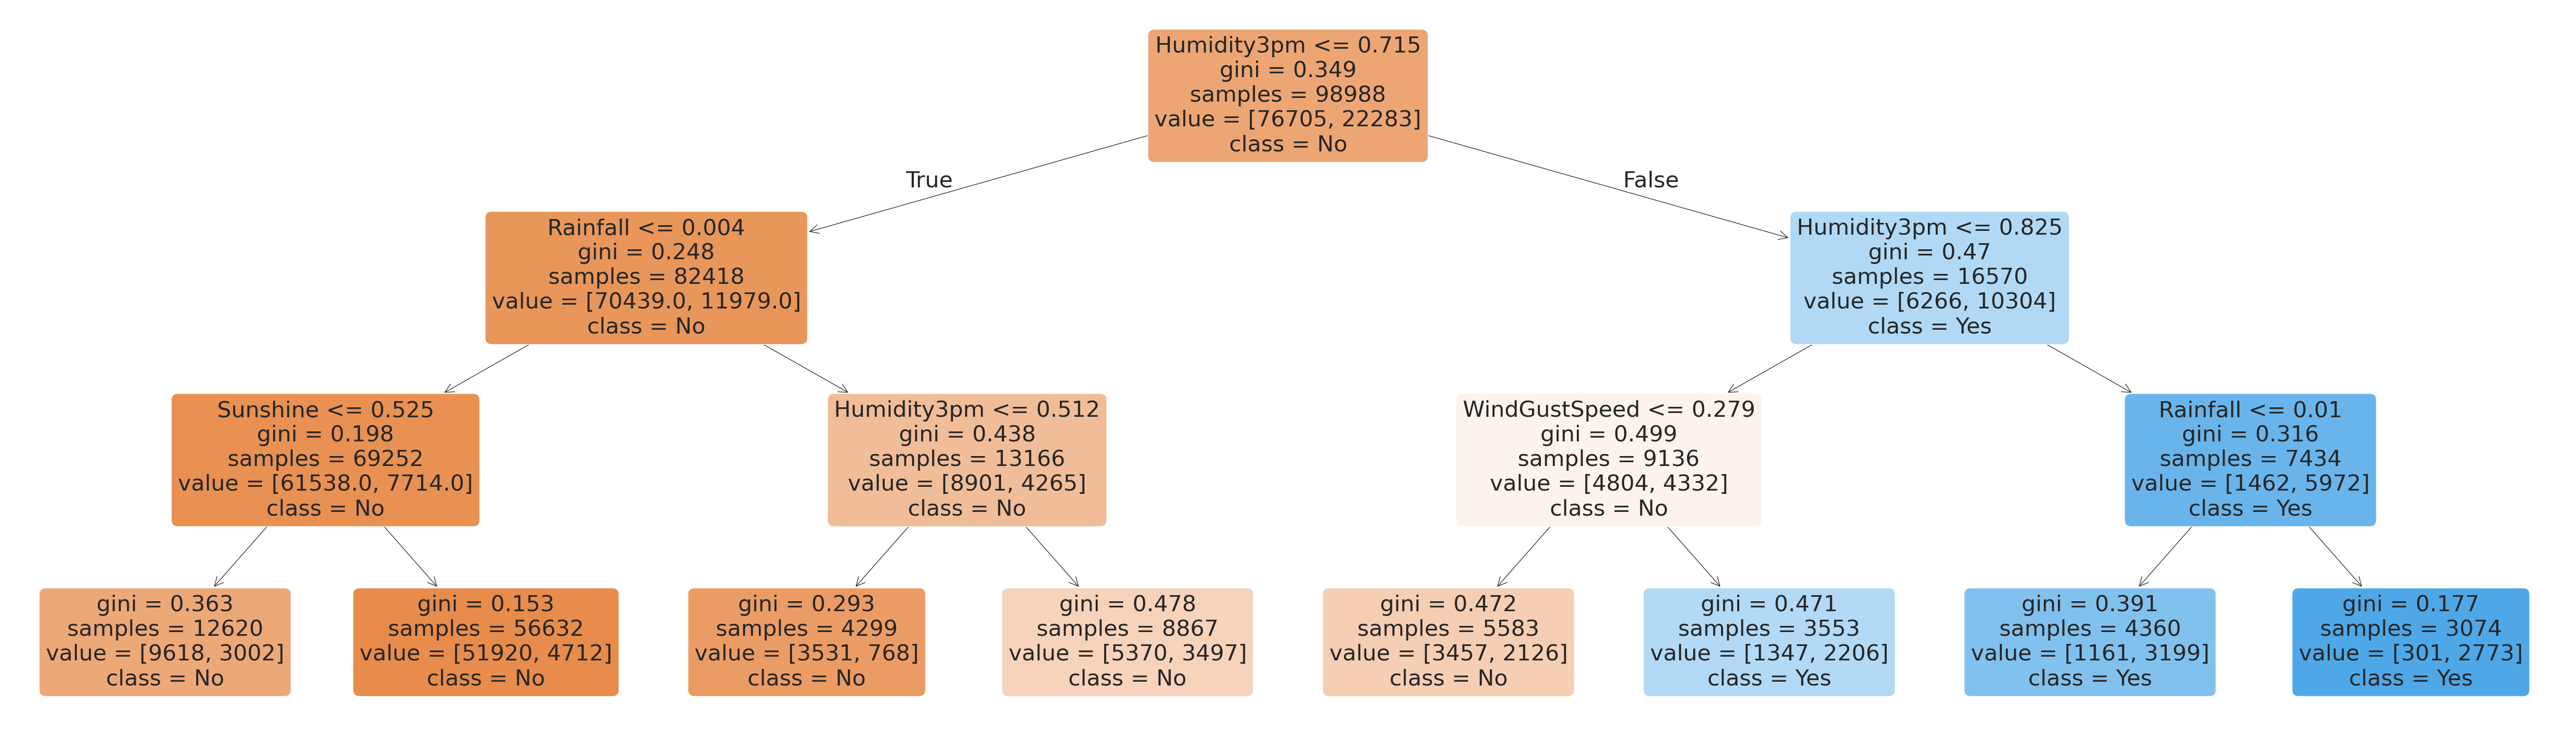

In [68]:
plt.figure(figsize=(70,20))
plot_tree(model, feature_names=X_train.columns, filled = True, rounded = True, class_names=model.classes_)

In [69]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



Let's experiment with different dephts using a helper function

In [70]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md, random_state=42)
  model.fit(X_train, train_target)
  train_error = 1 - model.score(X_train, train_target)
  val_error = 1 - model.score(X_val, val_target)
  return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [71]:
error_df = pd.DataFrame([max_depth_error(md) for md in range (1, 21)])

In [72]:
error_df

Max Depth  Training Error  Validation Error
0           1        0.184315          0.177935
1           2        0.179547          0.172712
2           3        0.170869          0.166560
3           4        0.165707          0.164355
4           5        0.160676          0.159074
5           6        0.156211          0.157275
6           7        0.153231          0.154721
7           8        0.147644          0.157797
8           9        0.140724          0.156346
9          10        0.132703          0.158319
10         11        0.122934          0.158842
11         12        0.113297          0.160989
12         13        0.101861          0.163252
13         14        0.090001          0.167315
14         15        0.079121          0.170913
15         16        0.068311          0.173757
16         17        0.058239          0.175904
17         18        0.048673          0.180140
18         19        0.040126          0.185015
19         20        0.032509          0.188556

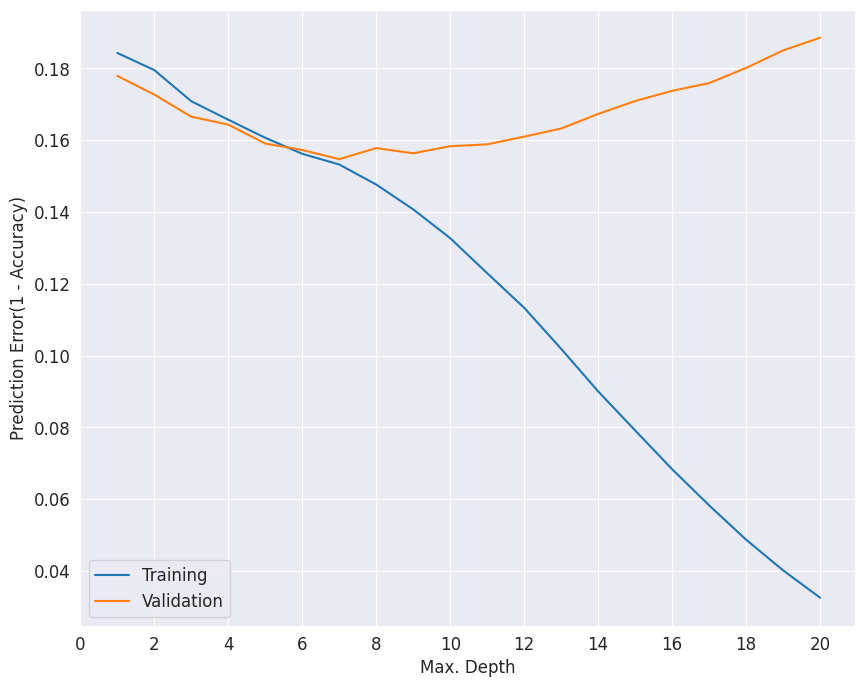

In [73]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.title=('Training vs. Validation Error')
plt.xticks(range(0, 21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error(1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [74]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_target)
model.score(X_train, train_target), model.score(X_val, val_target)

(0.8467693053703479, 0.8452788578724392)

### max_leaf_nodes
Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes.This allows branches to the trees to have varying depths

In [75]:
model = DecisionTreeClassifier(max_leaf_nodes = 128, random_state=42)

In [76]:
model.fit(X_train, train_target)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [77]:
model.score(X_train, train_target)

0.8480421869317493

In [78]:
model.score(X_val, val_target)

0.8442342290058615

In [79]:
model.tree_.max_depth

12

In [80]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

In [81]:
model = DecisionTreeClassifier(max_leaf_nodes = 130, random_state=42)

In [82]:
model.fit(X_val, val_target)

DecisionTreeClassifier(max_leaf_nodes=130, random_state=42)

In [83]:
model.score(X_val, val_target)

0.8738320468922292

In [84]:
model.tree_.max_depth

14

In [85]:
model_text = export_text(model, feature_names=list(X_val.columns))
print(model_text[:3500])

|--- Humidity3pm <= 0.73
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.51
|   |   |   |--- Pressure3pm <= 0.59
|   |   |   |   |--- WindDir9am_N <= 0.50
|   |   |   |   |   |--- MaxTemp <= 0.50
|   |   |   |   |   |   |--- WindGustSpeed <= 0.19
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- WindGustSpeed >  0.19
|   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |--- MaxTemp >  0.50
|   |   |   |   |   |   |--- WindGustSpeed <= 0.43
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- WindGustSpeed >  0.43
|   |   |   |   |   |   |   |--- Sunshine <= 0.33
|   |   |   |   |   |   |   |   |--- Humidity9am <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |--- Humidity9am >  0.50
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   

### **Training a Random Forest**

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest.

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also known as the "wisdom of the crowd" in common parlance:

In [86]:
from sklearn.ensemble import RandomForestClassifier

`n_jobs` allows the random forest to use multiple parallel workers to train the decision trees, and `random_state = 42` ensures that we get the same results for each execution.

In [87]:
%time
model = RandomForestClassifier(n_jobs=-1, random_state=42)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [88]:
%time
model.fit(X_train, train_target)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs


RandomForestClassifier(n_jobs=-1, random_state=42)

In [89]:
model.score(X_train, train_target)

0.9999595910615429

In [90]:
model.score(X_val, val_target)

0.8553769369160235

In [91]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.92, 0.08],
       [0.99, 0.01],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.93, 0.07]])

We can access the individual decision tress using `model.estimators`

In [92]:
len(model.estimators_)

100

In [93]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

[Text(0.5, 0.875, 'RainToday_No <= 0.5\ngini = 0.351\nsamples = 62756\nvalue = [76554, 22434]\nclass = No'),
 Text(0.25, 0.625, 'Cloud3pm <= 0.833\ngini = 0.498\nsamples = 14498\nvalue = [12089, 10685]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Pressure9am <= 0.564\ngini = 0.488\nsamples = 12374\nvalue = [11189, 8220]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'MaxTemp <= 0.615\ngini = 0.392\nsamples = 2124\nvalue = [900, 2465]\nclass = Yes'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'WindGustSpeed <= 0.364\ngini = 0.261\nsamples = 48258\nvalue = [64465.0, 11749.0]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Cloud9am <= 0.611\ngini = 0.228\nsamples = 42118\nvalue = [57800, 8705]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Sunshine <= 0.459\ngini = 

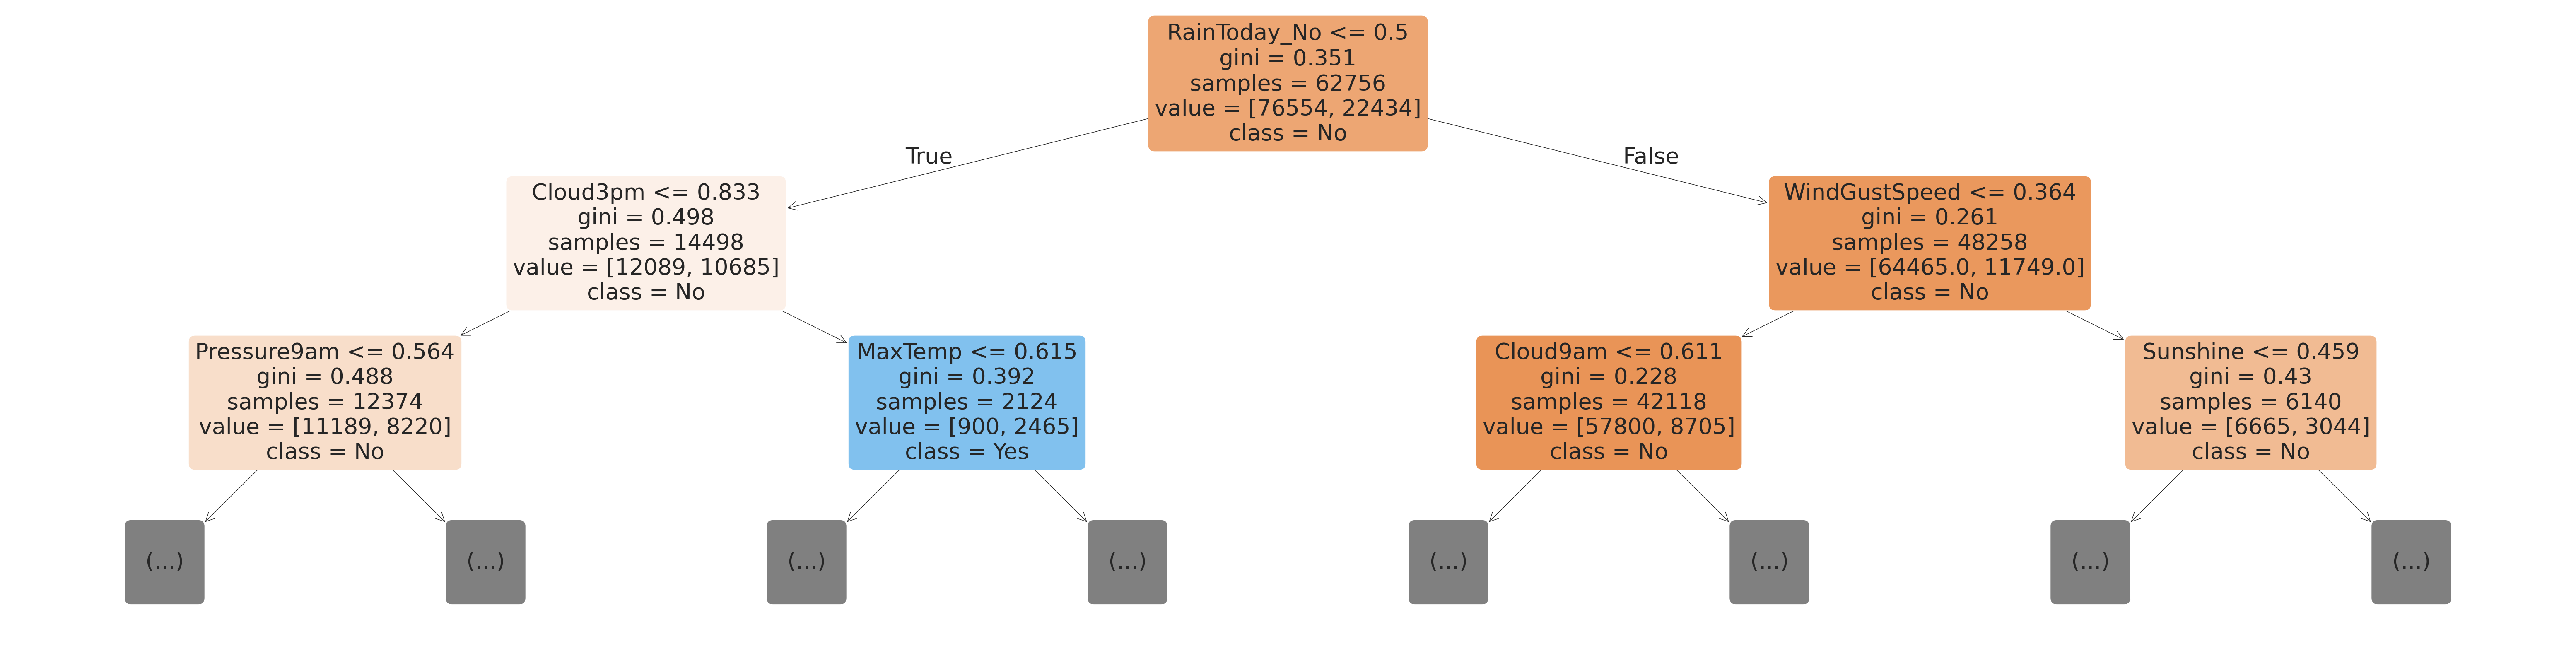

In [94]:
plt.figure(figsize=(80, 20))
plot_tree(model.estimators_[1],max_depth=2, feature_names=X_train.columns, filled = True, rounded= True, class_names=model.classes_)

[Text(0.5, 0.875, 'Sunshine <= 0.417\ngini = 0.349\nsamples = 62448\nvalue = [76707, 22281]\nclass = No'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.745\ngini = 0.499\nsamples = 11821\nvalue = [9860, 8914]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'WindSpeed9am <= 0.15\ngini = 0.45\nsamples = 7988\nvalue = [8315, 4320]\nclass = No'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindSpeed9am <= 0.062\ngini = 0.377\nsamples = 3833\nvalue = [1545, 4594]\nclass = Yes'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.745\ngini = 0.278\nsamples = 50627\nvalue = [66847, 13367]\nclass = No'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Cloud3pm <= 0.278\ngini = 0.216\nsamples = 45991\nvalue = [63920, 8957]\nclass = No'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Location_NorahHead <= 0.5\ngin

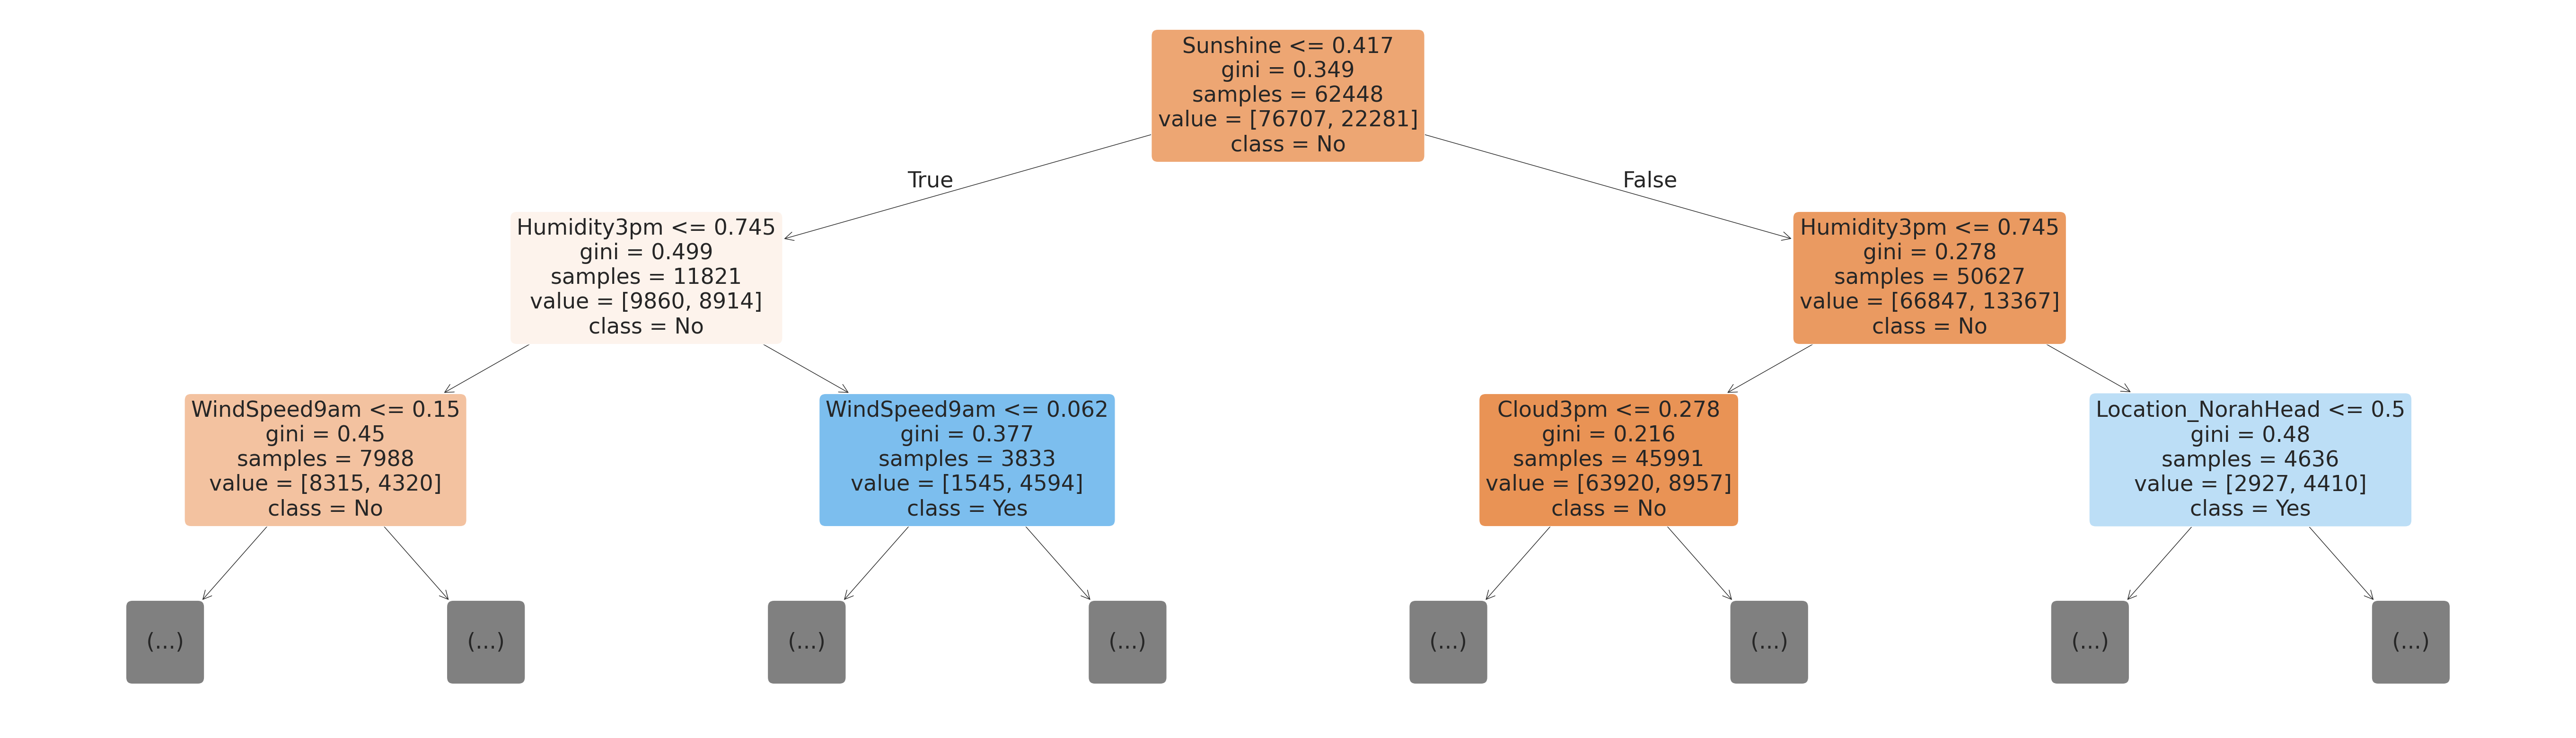

In [95]:
plt.figure(figsize=(70, 20))
plot_tree(model.estimators_[15],max_depth=2, feature_names=X_train.columns, filled = True, rounded= True, class_names=model.classes_)

Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees

In [96]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending = False)

In [97]:
importance_df.head(10)

feature  importance
9     Humidity3pm    0.139391
4        Sunshine    0.055504
11    Pressure3pm    0.054219
8     Humidity9am    0.050754
10    Pressure9am    0.048210
5   WindGustSpeed    0.047833
2        Rainfall    0.047278
15        Temp3pm    0.045182
1         MaxTemp    0.041811
0         MinTemp    0.041537

<Axes: xlabel='importance', ylabel='feature'>

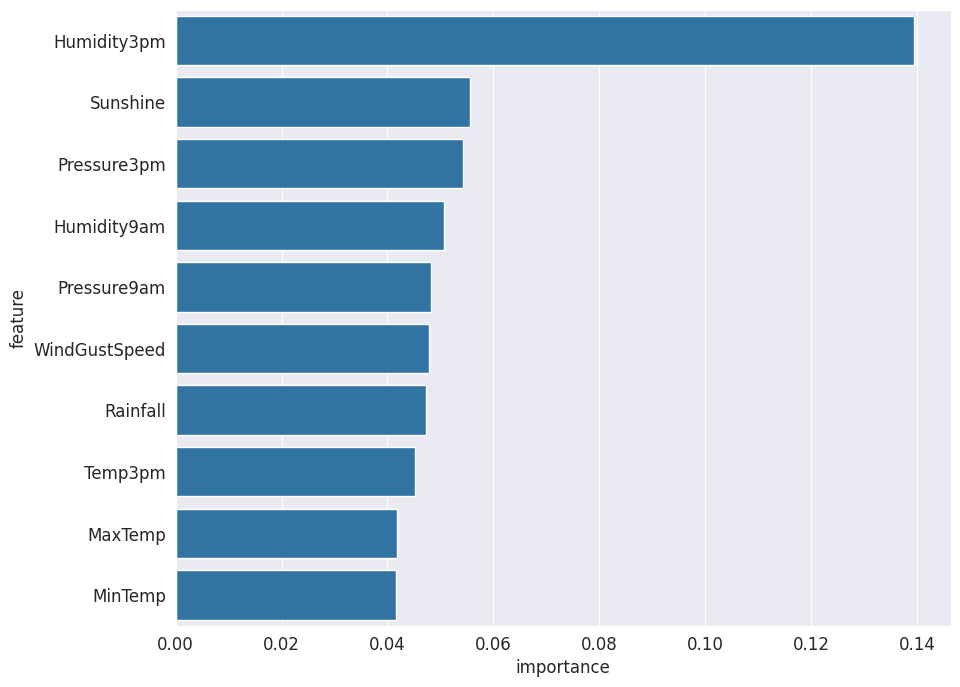

In [98]:
plt.title=('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

### HyperParameter Tuning With Random Forests

In [99]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_target)

In [100]:
base_model

RandomForestClassifier(n_jobs=-1, random_state=42)

In [101]:
base_train_acc = base_model.score(X_train, train_target)
base_val_acc = base_model.score(X_val, val_target)

In [102]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999595910615429, 0.8553769369160235)

## n_estimators
This argument controls the number of decision trees in the random forest.The default value is 100. For larger datasets,it helps to have a great number of estimators. As a general rule,try to have as few estimators as needed.

**10 estimators**

In [103]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10).fit(X_train, train_target)

In [104]:
model.score(X_train, train_target), model.score(X_val, val_target)

(0.9872105709783005, 0.8467297312982416)

In [105]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [106]:
model = RandomForestClassifier(random_state=42, n_jobs= -1, n_estimators=700).fit(X_val, val_target)

In [107]:
model.score(X_val, val_target)

1.0

Let's define the helper function `test_params`to make it easy to test hyperparameters

In [108]:
def test_params(**params):
  model = RandomForestClassifier(random_state=42, n_jobs= -1, **params).fit(X_train, train_target)
  return model.score(X_train, train_target), model.score(X_val, val_target)

In [109]:
test_params(max_depth=5)

(0.8209681981654342, 0.8250826997852707)

In [110]:
test_params(max_depth=26)

(0.9816543419404372, 0.8567697754047937)

In [111]:
test_params(max_leaf_nodes=2**10)

(0.877247747201681, 0.8500377227090709)

In [112]:
test_params(max_leaf_nodes=2**20)

(0.9999595910615429, 0.8572920898380825)

In [113]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [114]:
def max_depth_error(md):
  model = RandomForestClassifier(max_depth=md, random_state=42)
  model.fit(X_train, train_target)
  train_error = 1 - model.score(X_train, train_target)
  val_error = 1 - model.score(X_val, val_target)
  return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [115]:
error_df1 = pd.DataFrame([max_depth_error(md) for md in range (1, 10)])

In [116]:
error_df1

Max Depth  Training Error  Validation Error
0          1        0.225108          0.211711
1          2        0.224512          0.211653
2          3        0.206752          0.200162
3          4        0.192215          0.187453
4          5        0.179032          0.174917
5          6        0.171425          0.168708
6          7        0.163687          0.164007
7          8        0.158070          0.159944
8          9        0.151917          0.157043

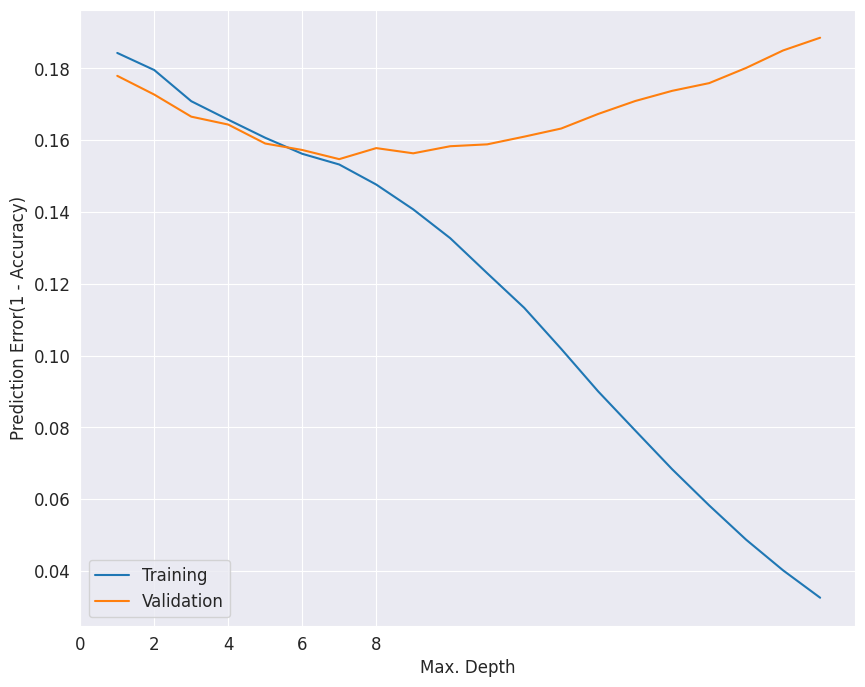

In [117]:
plt.figure()
plt.plot(error_df['Max Depth'], error_df['Training Error'])
plt.plot(error_df['Max Depth'], error_df['Validation Error'])
plt.title=('Training vs. Validation Error')
plt.xticks(range(0, 10, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error(1 - Accuracy)')
plt.legend(['Training', 'Validation'])

### max_features
Instead of picking all features(columns) for every split, we can speicfy that only a fraction of features be chosen randomly to figure out a split.

In [118]:
test_params(max_features='log2')

(0.9999494888269285, 0.8540421333642852)

In [119]:
test_params(max_features=8)

(0.9999595910615429, 0.8553769369160235)

In [120]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [121]:
test_params(max_features=7)

(0.9999595910615429, 0.8571760199640184)

### `min_samples_split` and `min_samples_leaf`

By default,the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behaviour and reduce overfitting, especially for very large datasets.

In [122]:
test_params(min_samples_split=5, min_samples_leaf=3)

(0.9319008364650261, 0.8553189019789914)

In [123]:
test_params(min_samples_split=150, min_samples_leaf=80)

(0.8462035802319473, 0.843305670013348)

In [124]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [125]:
## min_impurity_decrease
test_params(min_impurity_decrease=1e-6)

(0.9885541681820018, 0.8560153212233764)

In [126]:
test_params(min_impurity_decrease=1e-3)

(0.7811047803774195, 0.7919447507399454)

In [127]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### bootstrap

In [128]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8586268933898207)

In [129]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### max_samples

When a bootstrap is enabled, you can also control the number of fraction of rows to be considered for each bootstrap using max_samples.

In [130]:
test_params(max_samples=0.8)

(0.9988887541924274, 0.8562474609715048)

In [131]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [132]:
train_target.value_counts() / len(train_target)

RainTomorrow
No     0.774892
Yes    0.225108
Name: count, dtype: float64

In [133]:
## class_weights

model.classes_

array(['No', 'Yes'], dtype=object)

In [134]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8552608670419592)

In [135]:
test_params(class_weight={'No':1, 'Yes':2})

(0.9999393865923142, 0.8554349718530555)

In [136]:
base_accs

(0.9999595910615429, 0.8553769369160235)

### Pulling it together

In [137]:
model = RandomForestClassifier(n_jobs=-1,
                               n_estimators=600,
                               max_depth=5,
                               random_state=42,
                               max_features=7,
                               class_weight={'No':1,'Yes':1.7})

In [138]:
model.fit(X_train,train_target)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.7}, max_depth=5,
                       max_features=7, n_estimators=600, n_jobs=-1,
                       random_state=42)

In [139]:
model.score(X_train,train_target), model.score(X_val, val_target)

(0.8317977936719603, 0.8334977656549243)

In [140]:
base_accs

(0.9999595910615429, 0.8553769369160235)

In [141]:
model = RandomForestClassifier(n_jobs=-1,
                               n_estimators=600,
                               max_depth=5,
                               random_state=42,
                               max_features=7,
                               class_weight={'No':1,'Yes':1.5})

In [142]:
model.fit(X_val, val_target)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=5,
                       max_features=7, n_estimators=600, n_jobs=-1,
                       random_state=42)

In [143]:
model.score(X_test, test_target)

0.8160853160853161

In [144]:
model.score(X_val,val_target)

0.8393592942951656

In [145]:
model.score(X_train,train_target)

0.8280801713338991

In [150]:
model = RandomForestClassifier(n_jobs=-1,
                               n_estimators=400,
                               max_depth=6,
                               random_state=42,
                               max_features=6,
                               class_weight={'No':1,'Yes':2})

In [151]:
model.fit(X_test,test_target)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 2}, max_depth=6,
                       max_features=6, n_estimators=400, n_jobs=-1,
                       random_state=42)

In [152]:
model.score(X_test, test_target)

0.8278663278663279

In [153]:
model.score(X_train, train_target)

0.8305148098759445

### Making Prediction for single input

In [154]:
def predict_input(model,single_input):
  input_df= pd.DataFrame([single_input])
  input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorial_cols])
  X_input =input_df[numeric_cols + encoded_cols]
  pred = model.predict(X_input)[0]
  proba = model.predict_proba(X_input)[0] [list(model.classes_).index(pred)]
  return pred,proba

In [160]:
new_input = {'Date': '2025-11-16',
             'Location': 'Katherine',
             'MinTemp': 30.2,
             'MaxTemp': 37.2,
             'Rainfall': 8.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 45.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 17.0,
             'WindSpeed3pm': 22.0,
             'Humidity9am': 81.0,
             'Humidity3pm': 85.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 3.0,
             'Cloud3pm': 5.0,
             'Temp9am': 28.7,
             'Temp3pm': 34.0,
             'RainToday': 'Yes'}

In [161]:
predict_input(model, new_input)

/tmp/ipython-input-2093431448.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2093431448.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2093431448.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2093431448.py:5: PerformanceWarning:

('Yes', np.float64(0.5999365157581333))

In [163]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Saving the job and reloading it

In [162]:
import joblib

In [164]:
rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorial_cols': categorial_cols,
    'encoded_cols': encoded_cols
}

In [165]:
joblib.dump(rain, 'rain.joblib')

['rain.joblib']

In [166]:
aus_rain = joblib.load('rain.joblib')

In [170]:
test_preds1 = aus_rain['model'].predict(X_test)
accuracy_score(test_target, test_preds1)

0.8278663278663279